<a href="https://www.kaggle.com/code/iremakdogan/project-2-law-of-large-numbers?scriptVersionId=175387919" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### This is a straigtforward project from "Scientific Python" Udemy course by Mike X Cohen, aims to explore importing and exporting data from text file.

Law of Large numbers: As the number of experiment increases, the average number of sample means approximates the population mean. This means only one sample or one experiment is unlikely to provide a good estimate of the true population. 

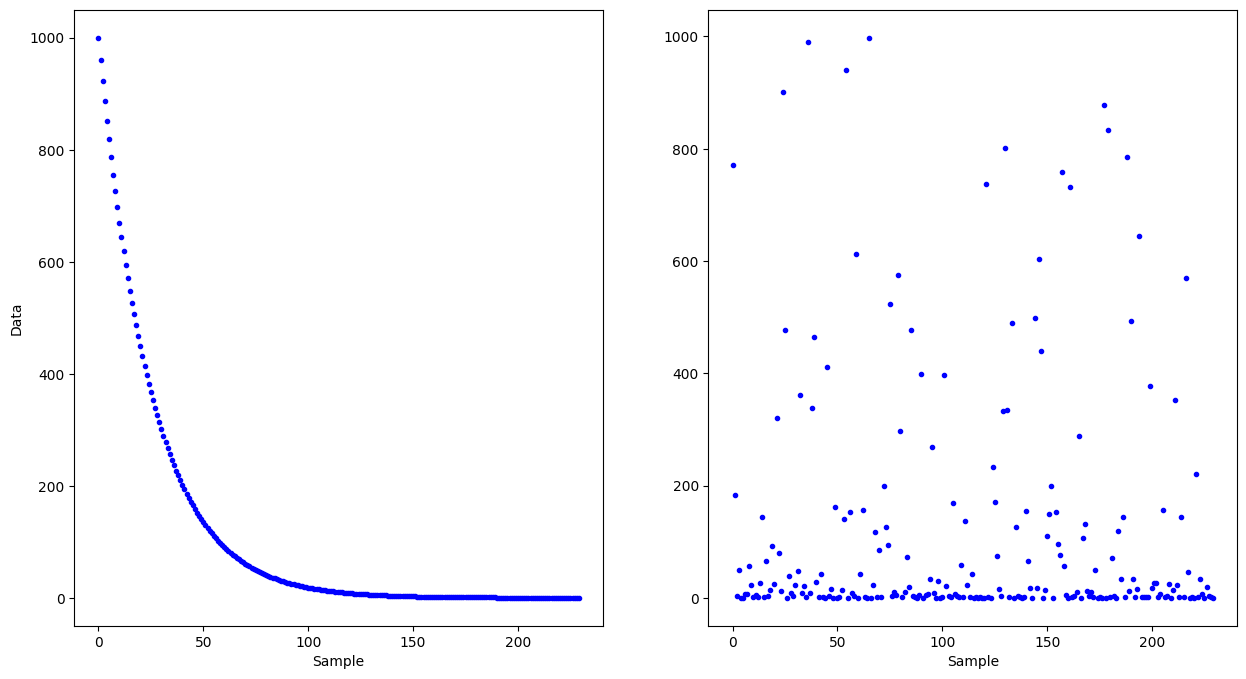

In [2]:
import matplotlib.pyplot as plt
import random

population_size = int(2.3e5)
f = np.logspace(np.log10(.001), np.log10(10), population_size) # 2.3e5
y = 1./f

skip = int(1e3)

fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(y[::skip], 'b.', linewidth = 2) # with skip, we go from first data point to last and skipping according to variable
random.shuffle(y) # in-place shuffling
ax[1].plot(y[::skip], 'b.', linewidth = 2)

ax[0].set_xlabel("Sample")
ax[0].set_ylabel("Data")
ax[1].set_xlabel("Sample")

plt.show()

### Monte Carlo Sampling
Randomly select from this dataset.Now we are gonna select randomly 1000 data points, take their means which will be our sample mean. We will also take true mean from the whole data. Plot them together. 

In [3]:
sample_size = 500
sample_means = np.zeros(sample_size)
# real_means = np.zeros(sample_size)

for i in range(sample_size):
    sample_means[i] = np.mean(np.random.choice(y, size=sample_size)) # directly select from y
    # real_means[i] = np.mean(y)

real_mean = np.mean(y) # without storing into arrays

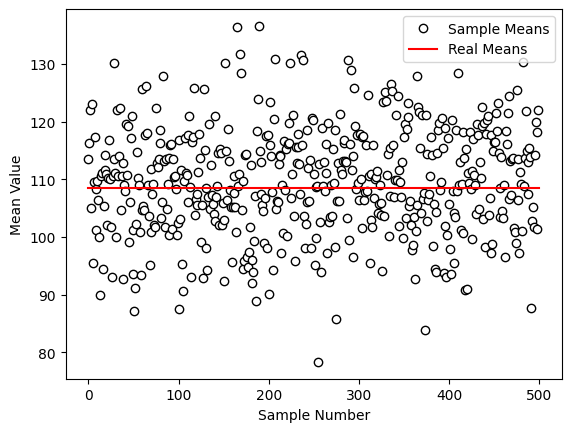

In [4]:
plt.plot(sample_means, 'ko', markerfacecolor = "w", label = "Sample Means")
# plt.plot(real_means, 'r', label = "Real Means")
plt.plot([0, sample_size],[real_mean, real_mean], 'r', label = "Real Means")

plt.legend()
plt.xlabel("Sample Number")
plt.ylabel("Mean Value")

plt.show()

**Cumulative Average** of all these sample points to see law of large numbers - for every sample point, we will sum up the value from 0 to that sample point -> it will slowly converge to the real mean and he divergence from the real mean getting smaller

In [5]:
cumulative_means = np.zeros(sample_size)
for cumi in range(sample_size):
    cumulative_means[cumi] = np.mean(y[0:cumi])

# squared divergence from real mean
# get 100 different sampling and divergence curve from their true mean
divergence_size = 100
sq_divergence = np.zeros((divergence_size, sample_size)) # generate this for different sampling
div_sample_means = np.zeros(sample_size) # new smapling for each time
all_sample_means =  np.zeros((divergence_size, sample_size)) 
for divi in range(divergence_size):
    # monte carlo simulations that gets random samples each time    
    for sampi in range(sample_size):
        div_sample_means[sampi] = np.mean(np.random.choice(y, size=sample_size))
        
    # cumulative average    
    tmp = np.cumsum(div_sample_means) / np.arange(1,sample_size+1)
    # square 
    sq_divergence[divi,:] = (tmp-real_mean) **2
    all_sample_means[divi, :] = div_sample_means

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


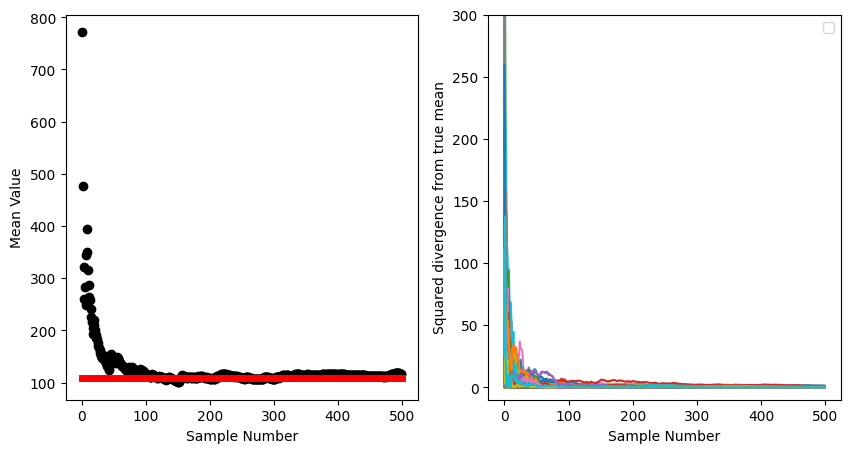

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(cumulative_means, 'ko',  label = "Cumulative Averages")
ax[0].plot([0, sample_size],[real_mean, real_mean], 'r', linewidth = 5, label = "True Mean")
ax[1].plot(sq_divergence.T)

ax[1].set_ylim([-10,300])

ax[0].set_xlabel("Sample Number")
ax[0].set_ylabel("Mean Value")
ax[1].set_xlabel("Sample Number")
ax[1].set_ylabel("Squared divergence from true mean")

plt.legend()
plt.show()

**The Central Limit Theorem**
The law of large numbers are closely related to Central Limit Theorem. This theorem tells us that the distribution of sample means is going to be roughly Gaussian distributed. So all the sample means are going to be distributed around the true mean. We will show this by using previous sample means 

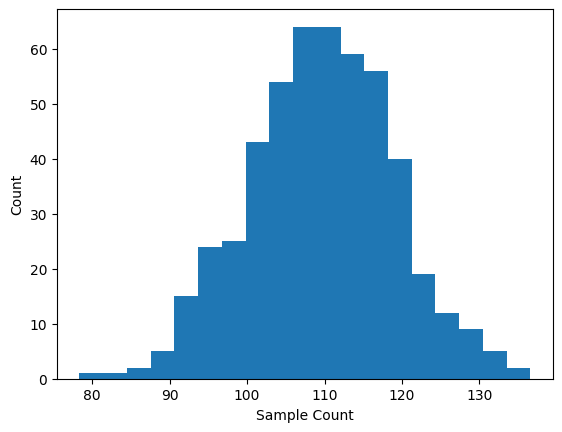

In [7]:
plt.hist(sample_means, bins = 'fd')
plt.xlabel('Sample Count')
plt.ylabel('Count')
plt.show()

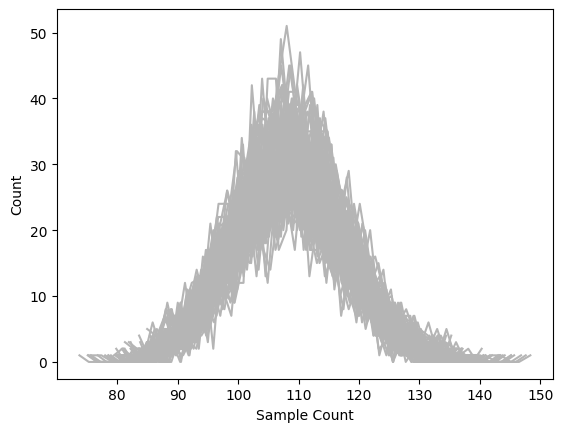

In [8]:
# now plot similar histogram for 100 sample means that we created above
for i in range(divergence_size):
    # we will use numpy histogram
    y,x = np.histogram(all_sample_means[i,:], bins = 40)
    x = (x[1:]+x[:-1])/2 #we take the average of lower and upper boundaries of each histogram bar - o.w. the size of x would be +1 than size of y
    plt.plot(x,y, color=[.708,.708,.708]) # RGB in [0,1]
 
plt.xlabel('Sample Count')
plt.ylabel('Count')
plt.show()